In [1]:
# importing portfolio
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas_datareader.data as pdr
import yfinance

yfinance.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [2]:
df_carteira = pd.read_excel("Carteira.xlsx")
display(df_carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,100
3,BBDC4,Ação,100
4,ITUB4,Ação,300
5,ENEV3,Ação,100
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,NTCO3,Ação,100
9,BCRI11,FII,100


In [3]:
data_inicial = datetime.now() - timedelta(days=360)
data_final = datetime.now()

lista_ativos = list(df_carteira["Ativos"].astype(str) + ".SA")

df_cotacoes = pdr.get_data_yahoo(lista_ativos, data_inicial, data_final)["Adj Close"]
display(df_cotacoes)

[*********************100%%**********************]  13 of 13 completed


Ticker,BBDC4.SA,BCRI11.SA,BOVA11.SA,BPAC11.SA,ENEV3.SA,ITUB4.SA,KNRI11.SA,MGLU3.SA,MOVI3.SA,NTCO3.SA,SMAL11.SA,VILG11.SA,XPLG11.SA
Date,,,,,,,,,,,,,
2023-06-26,15.606793,69.082527,114.419998,29.407408,11.99,26.856407,145.416916,31.800993,10.64,16.828640,108.250000,97.034225,104.393120
2023-06-27,15.661226,70.177673,113.769997,29.221720,11.75,26.556232,145.889328,31.613928,10.40,16.655842,106.300003,97.413475,105.026245
2023-06-28,15.402915,70.327820,113.029999,29.319450,11.82,26.406149,147.297470,31.333330,10.00,16.118248,106.349998,97.496742,105.268341
2023-06-29,15.469886,70.460289,114.910004,30.247900,11.99,26.725084,148.965012,32.268654,10.37,16.156645,108.800003,99.208015,105.584908
2023-06-30,15.737763,70.460289,114.169998,30.736559,12.27,26.659418,148.010834,31.520395,10.53,16.070248,109.500000,102.676834,106.320442
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-14,12.830000,66.540001,116.220001,31.900000,12.50,31.139999,155.649994,11.440000,6.03,14.800000,93.370003,82.000000,102.669998
2024-06-17,12.970000,66.220001,115.739998,31.670000,12.32,31.900000,154.050003,10.990000,5.84,14.540000,93.000000,82.150002,102.540001
2024-06-18,12.380000,66.410004,116.120003,31.940001,12.32,31.879999,153.820007,10.950000,5.81,14.780000,93.300003,81.910004,102.550003


In [4]:
#adjusting data

df_cotacoes = df_cotacoes.ffill()
print(df_cotacoes.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2023-06-26 to 2024-06-20
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BBDC4.SA   247 non-null    float64
 1   BCRI11.SA  247 non-null    float64
 2   BOVA11.SA  247 non-null    float64
 3   BPAC11.SA  247 non-null    float64
 4   ENEV3.SA   247 non-null    float64
 5   ITUB4.SA   247 non-null    float64
 6   KNRI11.SA  247 non-null    float64
 7   MGLU3.SA   247 non-null    float64
 8   MOVI3.SA   247 non-null    float64
 9   NTCO3.SA   247 non-null    float64
 10  SMAL11.SA  247 non-null    float64
 11  VILG11.SA  247 non-null    float64
 12  XPLG11.SA  247 non-null    float64
dtypes: float64(13)
memory usage: 27.0 KB
None


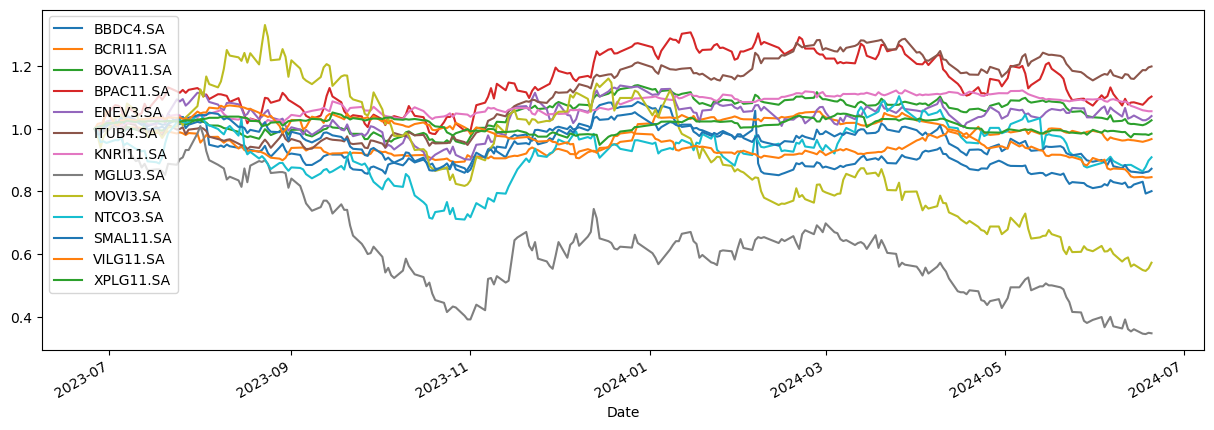

In [5]:
#normalizing
df_cotacoes_norm = df_cotacoes / df_cotacoes.iloc[0]
df_cotacoes_norm.plot(figsize=(15,5))
plt.legend(loc="upper left")
plt.show()

In [6]:
#bringing IBOV datba
df_ibov = pdr.get_data_yahoo("^BVSP", data_inicial, data_final)["Adj Close"]
display(df_ibov)

[*********************100%%**********************]  1 of 1 completed


Date
2023-06-26    118243.0000
2023-06-27    117523.0000
2023-06-28    116681.0000
2023-06-29    118383.0000
2023-06-30    118087.0000
                 ...     
2024-06-14    119662.0000
2024-06-17    119138.0000
2024-06-18    119630.0000
2024-06-19    120261.0000
2024-06-20    121017.4375
Name: Adj Close, Length: 247, dtype: float64

In [7]:
df_valor_investido = pd.DataFrame()

for ativo in df_carteira["Ativos"]:
    qtde_acoes = df_carteira.loc[df_carteira["Ativos"]==ativo,"Qtde"].values[0]
    df_valor_investido[ativo] = qtde_acoes * df_cotacoes[f"{ativo}.SA"]
    
df_valor_investido["Total"] = df_valor_investido.sum(axis=1)
display(df_valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11,Total
Date,,,,,,,,,,,,,,
2023-06-26,11441.999817,10825.000000,3180.099297,1560.679340,8056.922150,1198.999977,1064.000034,2940.740776,1682.863998,6908.252716,9703.422546,14541.691589,10439.311981,83543.984222
2023-06-27,11376.999664,10630.000305,3161.392784,1566.122627,7966.869736,1175.000000,1039.999962,2922.171974,1665.584183,7017.767334,9741.347504,14588.932800,10502.624512,83354.813385
2023-06-28,11302.999878,10634.999847,3133.333015,1540.291500,7921.844673,1181.999969,1000.000000,2931.945038,1611.824799,7032.781982,9749.674225,14729.747009,10526.834106,83298.276043
2023-06-29,11491.000366,10880.000305,3226.865387,1546.988583,8017.525291,1198.999977,1036.999989,3024.790001,1615.664482,7046.028900,9920.801544,14896.501160,10558.490753,84460.656738
2023-06-30,11416.999817,10950.000000,3152.039528,1573.776340,7997.825432,1227.000046,1052.999973,3073.655891,1607.024765,7046.028900,10267.683411,14801.083374,10632.044220,84798.161697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-14,11622.000122,9337.000275,1143.999958,1282.999992,9341.999817,1250.000000,603.000021,3189.999962,1480.000019,6654.000092,8200.000000,15564.999390,10266.999817,79936.999464
2024-06-17,11573.999786,9300.000000,1098.999977,1297.000027,9569.999886,1231.999969,584.000015,3167.000008,1453.999996,6622.000122,8215.000153,15405.000305,10254.000092,79773.000336
2024-06-18,11612.000275,9330.000305,1094.999981,1238.000011,9563.999748,1231.999969,580.999994,3194.000053,1477.999973,6641.000366,8191.000366,15382.000732,10255.000305,79793.002081


Date
2023-06-26    1.000000
2023-06-27    0.993911
2023-06-28    0.986790
2023-06-29    1.001184
2023-06-30    0.998681
                ...   
2024-06-14    1.012001
2024-06-17    1.007569
2024-06-18    1.011730
2024-06-19    1.017067
2024-06-20    1.023464
Name: Adj Close, Length: 247, dtype: float64

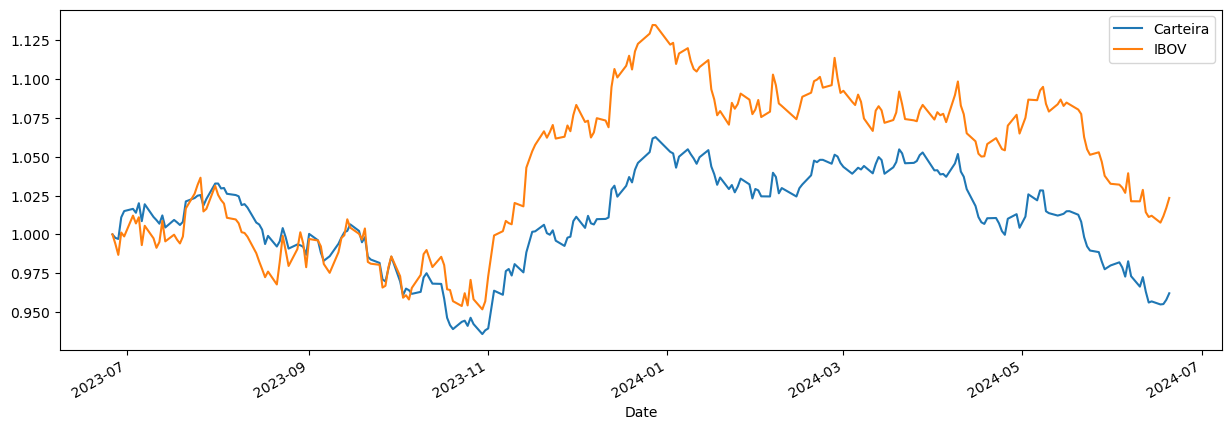

In [8]:
df_ibov_norm = df_ibov / df_ibov.iloc[0]
df_valor_investido_norm = df_valor_investido / df_valor_investido.iloc[0]

df_valor_investido_norm["Total"].plot(label="Carteira", figsize=(15,5))
df_ibov_norm.plot(label="IBOV")
plt.legend()
display(df_ibov_norm)

In [9]:
#return
retorno_ibov = df_ibov_norm[-1] - 1
retorno_carteira = df_valor_investido_norm["Total"][-1] - 1
print(f"Retorno IBOV: {retorno_ibov:.1%}")
print(f"Retorno Carteira: {retorno_carteira:.1%}")

Retorno IBOV: 2.3%
Retorno Carteira: -3.8%


In [10]:
#correlation
print(df_valor_investido["Total"].corr(df_ibov))


0.796642892525771
